In this notebook:
    - station data and normalized temperature evolution data are merged
    - plot evolution and regression by station to analyze slopes
    - histogram to analyze slopes by isUrban and # of data points

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time as t
import re
from sklearn import datasets, linear_model
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
#import stations with isUrban flag for selected cols
cols = ['Station ID','Station Name', 'Latitude','Longitude','Elevation (m)', 'isUrban' ]
df_stations = pd.read_csv('Dades/OUTPUT XX Filtered Stations Urban-No Urban.csv', skipinitialspace = True, usecols = cols)

In [3]:
#import dades normalitzades
df = pd.read_csv('Dades/OUTPUT 04 Dades Normalitzades.csv')

In [4]:
#merge data with urban information
df_urban = pd.merge(df,df_stations,how='inner',  on ='Station ID')

In [5]:
df_isUrban_byyear = df_urban.pivot_table(index='Year',columns='isUrban',values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')

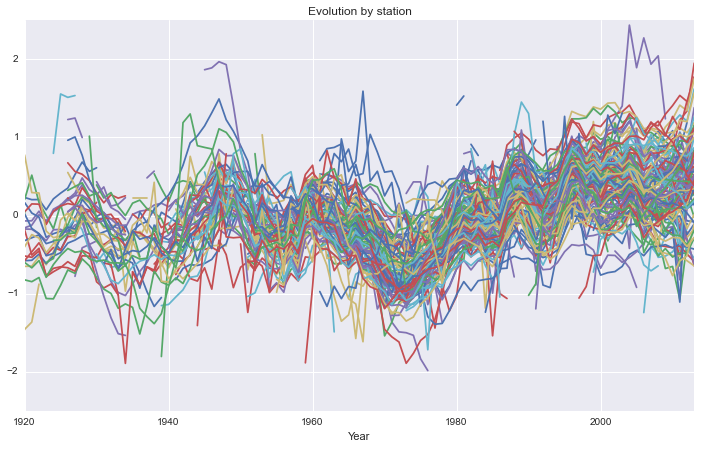

In [6]:
df_station_byyear = df_urban.pivot_table(index='Year',columns=['Station ID'],values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
plt.figure
df_station_byyear.plot(legend=False,xlim=(1920,2013),figsize=(12,7), title='Evolution by station', ylim=(-2.5,2.5))

#Analysis by station (year)

Split by station and make a regression for each one to see how many have a positive slope and how many don't

In [7]:
df_station_byyear_stacked = df_station_byyear.stack()

In [8]:
stations = df['Station ID'].unique()

In [9]:
#A dictionary is created containg isUrban and slope for each station

slopes_dict = {}
for s in stations:
    try:
        data_s = df_station_byyear_stacked[:,s]
        regrs = linear_model.LinearRegression()
        S_X = pd.DataFrame(data_s.index)
        S_Y = pd.DataFrame(data_s.values)
        regrs.fit(S_X,S_Y)
        slopes_dict[s] = [int(df_stations['isUrban'][df_stations['Station ID']==s]),float(regrs.coef_)]
    except: pass

    

In [10]:
# % of positives and negatives are calculated from the obtained values

from __future__ import division

s_urban_positive = 0
s_urban_negative = 0
s_nonurban_positive = 0
s_nonurban_negative = 0

for s in slopes_dict.keys():
    if slopes_dict.get(s)[0] == 1: #if urban
        
        if slopes_dict.get(s)[1] > 0:
            s_urban_positive += 1
        else: 
            s_urban_negative += 1
            
    else:  #non urban
        if slopes_dict.get(s)[1] > 0:
            s_nonurban_positive += 1
        else: 
            s_nonurban_negative += 1
            
            
if (s_urban_positive + s_urban_negative + s_nonurban_positive + s_nonurban_negative) ==   len(slopes_dict.keys()):
    print 'ok'
    print '% Positive urban:' , round(s_urban_positive / (s_urban_positive + s_urban_negative)*100,2),'%'
    print '% Positive non urban:' , round(s_nonurban_positive / (s_nonurban_positive + s_nonurban_negative)*100,2),'%'
else: print 'you lost something'

ok
% Positive urban: 76.53 %
% Positive non urban: 87.3 %


In [11]:
#two vectors (urban-no urban) are generated using the dictionary
vector_urban=[]
vector_nonurban=[]


for s in slopes_dict.keys():
    if slopes_dict.get(s)[0] == 1: #if urban
        
        vector_urban.append(slopes_dict.get(s)[1])
        
            
    else:  #non urban
        
        vector_nonurban.append(slopes_dict.get(s)[1])
            
if (len(vector_urban)+len(vector_nonurban)==len(slopes_dict.keys())):
    print "OK"
else: print 'you lost something'

OK


Slope Histogram by is Urban

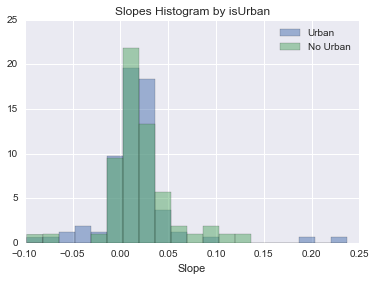

In [12]:
xmin=min(min(vector_urban), min(vector_nonurban))
xmax=max(max(vector_urban), max(vector_nonurban))

plt.figure()
plt.hist(vector_urban, normed=True, alpha=0.5, range=(xmin,xmax), bins=20, label="Urban")
plt.hist(vector_nonurban, normed=True, alpha=0.5, range=(xmin,xmax), bins=20, label="No Urban")
plt.legend()
plt.xlabel('Slope')
plt.title('Slopes Histogram by isUrban')

#Analysis by station (Date)

Split by station and make a regression for each one to see how many have a positive slope and how many don't

In [13]:
df_station_bydate = df_urban.pivot_table(index='Date',columns=['Station ID'],values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
df_station_bydate_stacked = df_station_bydate.stack()
stations = df['Station ID'].unique()

In [14]:
#A dictionary is created containg isUrban and slope for each station
slopes_dict_date = {}
for s in stations:
    try:
        data_s = df_station_bydate_stacked[:,s]
        regrs = linear_model.LinearRegression()
        S_X = pd.DataFrame(data_s.index)
        S_Y = pd.DataFrame(data_s.values)
        regrs.fit(S_X,S_Y)
        slopes_dict_date[s] = [int(df_stations['isUrban'][df_stations['Station ID']==s]),float(regrs.coef_)]
    except: pass

In [15]:
# % of positives and negatives are calculated from the obtained values

from __future__ import division

s_urban_positive = 0
s_urban_negative = 0
s_nonurban_positive = 0
s_nonurban_negative = 0

for s in slopes_dict_date.keys():
    if slopes_dict_date.get(s)[0] == 1: #if urban
        
        if slopes_dict_date.get(s)[1] > 0:
            s_urban_positive += 1
        else: 
            s_urban_negative += 1
            
    else:  #non urban
        if slopes_dict_date.get(s)[1] > 0:
            s_nonurban_positive += 1
        else: 
            s_nonurban_negative += 1
            
            
if (s_urban_positive + s_urban_negative + s_nonurban_positive + s_nonurban_negative) ==   len(slopes_dict_date.keys()):
    print 'ok'
    print '% Positive urban:' , round(s_urban_positive / (s_urban_positive + s_urban_negative)*100,2),'%'
    print '% Positive non urban:' , round(s_nonurban_positive / (s_nonurban_positive + s_nonurban_negative)*100,2),'%'
else: print 'you lost something'

ok
% Positive urban: 76.53 %
% Positive non urban: 88.89 %


In [16]:
#two vectors (urban-no urban) are generated using the dictionary

vector_urban=[]
vector_nonurban=[]


for s in slopes_dict_date.keys():
    if slopes_dict_date.get(s)[0] == 1: #if urban
        
        vector_urban.append(slopes_dict_date.get(s)[1])
        
            
    else:  #non urban
        
        vector_nonurban.append(slopes_dict_date.get(s)[1])
            
if (len(vector_urban)+len(vector_nonurban)==len(slopes_dict_date.keys())):
    print "OK"
else: print 'you lost something'

OK


Slope histogram

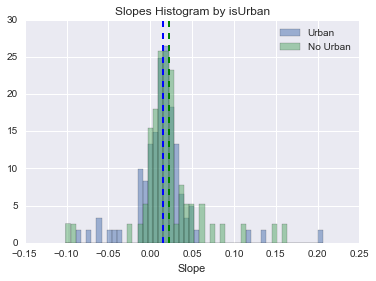

In [17]:
xmin=min(min(vector_urban), min(vector_nonurban))
xmax=max(max(vector_urban), max(vector_nonurban))

plt.hist(vector_urban, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.axvline(sum(vector_urban)/len(vector_urban), color='b', linestyle='dashed', linewidth=2)
plt.hist(vector_nonurban, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.axvline(sum(vector_nonurban)/len(vector_nonurban), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Slope')
plt.title('Slopes Histogram by isUrban')

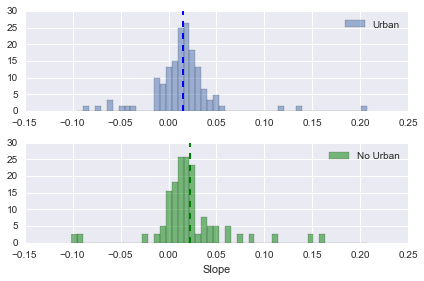

In [18]:
xmin=min(min(vector_urban), min(vector_nonurban))
xmax=max(max(vector_urban), max(vector_nonurban))

plt.subplot(211)
plt.hist(vector_urban, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.axvline(sum(vector_urban)/len(vector_urban), color='b', linestyle='dashed', linewidth=2)
plt.legend()
plt.subplot(212)
plt.hist(vector_nonurban, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.axvline(sum(vector_nonurban)/len(vector_nonurban), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Slope')
plt.tight_layout()

Year > 1970

In [19]:
df_urban70 = df_urban[df_urban.Year>1969]
df_station_bydate70 = df_urban70.pivot_table(index='Date',columns=['Station ID'],values = 'Temperature Norm Smoothed (moving avg)',aggfunc='mean')
df_station_bydate_stacked70 = df_station_bydate70.stack()
stations = df['Station ID'].unique()

In [20]:
#creem un diccionari que per cada estació conté isUrban-slope

slopes_dict_date70 = {}
for s in stations:
    try:
        data_s = df_station_bydate_stacked70[:,s]
        regrs = linear_model.LinearRegression()
        S_X = pd.DataFrame(data_s.index)
        S_Y = pd.DataFrame(data_s.values)
        regrs.fit(S_X,S_Y)
        slopes_dict_date70[s] = [int(df_stations['isUrban'][df_stations['Station ID']==s]),float(regrs.coef_)]
    except: pass

In [21]:
#càculs a partir dels valors obtinguts

from __future__ import division

s_urban_positive = 0
s_urban_negative = 0
s_nonurban_positive = 0
s_nonurban_negative = 0

for s in slopes_dict_date70.keys():
    if slopes_dict_date70.get(s)[0] == 1: #if urban
        
        if slopes_dict_date70.get(s)[1] > 0:
            s_urban_positive += 1
        else: 
            s_urban_negative += 1
            
    else:  #non urban
        if slopes_dict_date70.get(s)[1] > 0:
            s_nonurban_positive += 1
        else: 
            s_nonurban_negative += 1
            
            
if (s_urban_positive + s_urban_negative + s_nonurban_positive + s_nonurban_negative) ==   len(slopes_dict_date70.keys()):
    print 'ok'
    print '% Positive urban:' , round(s_urban_positive / (s_urban_positive + s_urban_negative)*100,2),'%'
    print '% Positive non urban:' , round(s_nonurban_positive / (s_nonurban_positive + s_nonurban_negative)*100,2),'%'
else: print 'you lost something'

ok
% Positive urban: 86.02 %
% Positive non urban: 93.33 %


In [22]:
vector_urban=[]
vector_nonurban=[]


for s in slopes_dict_date70.keys():
    if slopes_dict_date70.get(s)[0] == 1: #if urban
        
        vector_urban.append(slopes_dict_date70.get(s)[1])
        
            
    else:  #non urban
        
        vector_nonurban.append(slopes_dict_date70.get(s)[1])
            
if (len(vector_urban)+len(vector_nonurban)==len(slopes_dict_date70.keys())):
    print "OK"
else: print 'you lost something'

OK


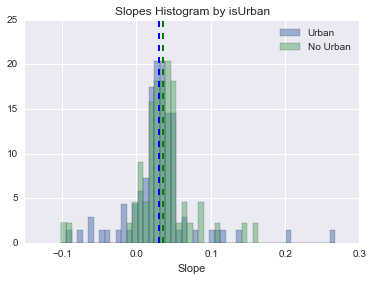

In [23]:
xmin=min(min(vector_urban), min(vector_nonurban))
xmax=max(max(vector_urban), max(vector_nonurban))

plt.hist(vector_urban, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.axvline(sum(vector_urban)/len(vector_urban), color='b', linestyle='dashed', linewidth=2)
plt.hist(vector_nonurban, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.axvline(sum(vector_nonurban)/len(vector_nonurban), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Slope')
plt.title('Slopes Histogram by isUrban')

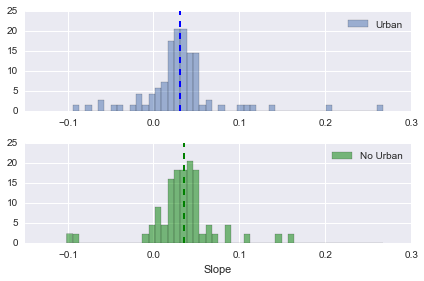

In [24]:
xmin=min(min(vector_urban), min(vector_nonurban))
xmax=max(max(vector_urban), max(vector_nonurban))


plt.subplot(211)
plt.hist(vector_urban, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.axvline(sum(vector_urban)/len(vector_urban), color='b', linestyle='dashed', linewidth=2)
plt.legend()
plt.subplot(212)
plt.hist(vector_nonurban, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.axvline(sum(vector_nonurban)/len(vector_nonurban), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Slope')
plt.tight_layout()

Adding datapoints to the dictionary

In [25]:
slopes_dict_datapoints = {}
for s in stations:    
        datapoints = len(df_station_bydate_stacked[:,s])
        data_s = df_station_bydate_stacked[:,s]
        regrs = linear_model.LinearRegression()
        S_X = pd.DataFrame(data_s.index)
        S_Y = pd.DataFrame(data_s.values)
        regrs.fit(S_X,S_Y)
        slopes_dict_datapoints[s] = [int(df_stations['isUrban'][df_stations['Station ID']==s]),float(regrs.coef_),datapoints]



In [26]:
vector_urban_datapoints=[]
vector_nonurban_datapoints=[]

for s in slopes_dict_datapoints.keys():
    if slopes_dict_datapoints.get(s)[0] == 1: #if urban
        
        vector_urban_datapoints.append(slopes_dict_datapoints.get(s)[2])
        
            
    else:  #non urban
        
        vector_nonurban_datapoints.append(slopes_dict_datapoints.get(s)[2])
            
if (len(vector_urban_datapoints)+len(vector_nonurban_datapoints)==len(slopes_dict_datapoints.keys())):
    print "OK"
else: print 'you lost something'

OK


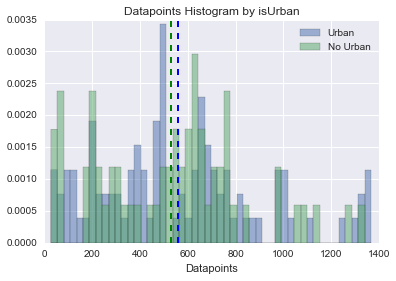

In [27]:
xmin=min(min(vector_urban_datapoints), min(vector_nonurban_datapoints))
xmax=max(max(vector_urban_datapoints), max(vector_nonurban_datapoints))

plt.hist(vector_urban_datapoints, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.axvline(sum(vector_urban_datapoints)/len(vector_urban_datapoints), color='b', linestyle='dashed', linewidth=2)
plt.hist(vector_nonurban_datapoints, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.axvline(sum(vector_nonurban_datapoints)/len(vector_nonurban_datapoints), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Datapoints')
plt.title('Datapoints Histogram by isUrban')

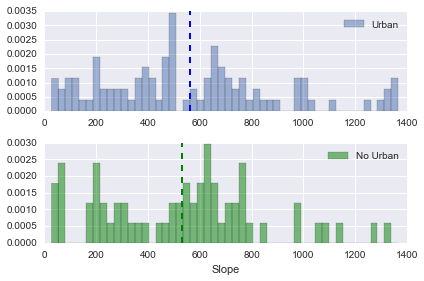

In [28]:
xmin=min(min(vector_urban_datapoints), min(vector_nonurban_datapoints))
xmax=max(max(vector_urban_datapoints), max(vector_nonurban_datapoints))

plt.subplot(211)
plt.hist(vector_urban_datapoints, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.axvline(sum(vector_urban_datapoints)/len(vector_urban_datapoints), color='b', linestyle='dashed', linewidth=2)
plt.legend()
plt.subplot(212)
plt.hist(vector_nonurban_datapoints, normed=True, alpha=0.5, range=(xmin,xmax),color='green', bins=50, label="No Urban")
plt.axvline(sum(vector_nonurban_datapoints)/len(vector_nonurban_datapoints), color='g', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Slope')
plt.tight_layout()

With this histogram we can see that the average is areound 500 datapoints per station. We can split histograms by bins of 250 datapoints

In [29]:
vector_urban_datapoints250=[]
vector_nonurban_datapoints250=[]
vector_urban_datapoints500=[]
vector_nonurban_datapoints500=[]
vector_urban_datapoints750=[]
vector_nonurban_datapoints750=[]
vector_urban_datapoints1000=[]
vector_nonurban_datapoints1000=[]
vector_urban_datapoints1250=[]
vector_nonurban_datapoints1250=[]
vector_urban_datapoints1500=[]
vector_nonurban_datapoints1500=[]

for s in slopes_dict_datapoints.keys():
    if slopes_dict_datapoints.get(s)[0] == 1: #if urban
        
        if slopes_dict_datapoints.get(s)[2] <250:
            vector_urban_datapoints250.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <500:
            vector_urban_datapoints500.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <750:
            vector_urban_datapoints750.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <1000:
            vector_urban_datapoints1000.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <1250:
            vector_urban_datapoints1250.append(slopes_dict_datapoints.get(s)[1])
        else:
            vector_urban_datapoints1500.append(slopes_dict_datapoints.get(s)[1])            
    else:  #non urban
        if slopes_dict_datapoints.get(s)[2] <250:
            vector_nonurban_datapoints250.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <500:
            vector_nonurban_datapoints500.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <750:
            vector_nonurban_datapoints750.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <1000:
            vector_nonurban_datapoints1000.append(slopes_dict_datapoints.get(s)[1])
        elif slopes_dict_datapoints.get(s)[2] <1250:
            vector_nonurban_datapoints1250.append(slopes_dict_datapoints.get(s)[1])
        else:
            vector_nonurban_datapoints1500.append(slopes_dict_datapoints.get(s)[1]) 
            
if (len(vector_urban_datapoints250) + len(vector_nonurban_datapoints250) + len(vector_urban_datapoints500) + len(vector_nonurban_datapoints500) + len(vector_urban_datapoints750)+len(vector_nonurban_datapoints750)+len(vector_urban_datapoints1000)+len(vector_nonurban_datapoints1000)+len(vector_urban_datapoints1250)+len(vector_nonurban_datapoints1250)+len(vector_urban_datapoints1500)+
len(vector_nonurban_datapoints1500)) == len(slopes_dict_datapoints.keys()):
    print "OK"
else: print 'you lost something'

OK


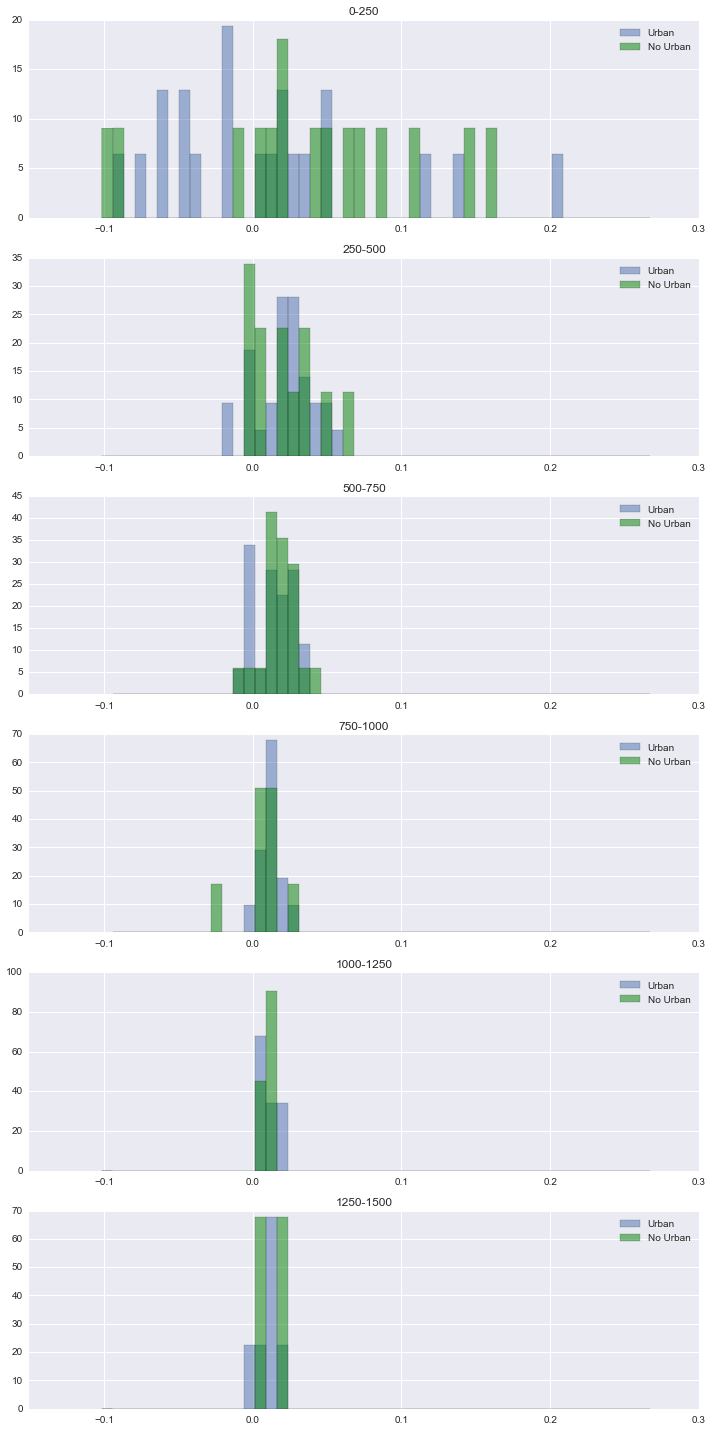

In [30]:
xmin=min(min(vector_urban), min(vector_nonurban))
xmax=max(max(vector_urban), max(vector_nonurban))

plt.figure(figsize=(10,20))

plt.subplot(611)
plt.hist(vector_urban_datapoints250, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.hist(vector_nonurban_datapoints250, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.title('0-250')
plt.legend()

plt.subplot(612)
plt.hist(vector_urban_datapoints500, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.hist(vector_nonurban_datapoints500, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.title('250-500')
plt.legend()


plt.subplot(613)
plt.hist(vector_urban_datapoints750, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.hist(vector_nonurban_datapoints750, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.title('500-750')
plt.legend()

plt.tight_layout()

plt.subplot(614)
plt.hist(vector_urban_datapoints1000, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.hist(vector_nonurban_datapoints1000, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.title('750-1000')
plt.legend()

plt.subplot(615)
plt.hist(vector_urban_datapoints1250, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.hist(vector_nonurban_datapoints1250, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.title('1000-1250')
plt.legend()


plt.subplot(616)
plt.hist(vector_urban_datapoints1500, normed=True, alpha=0.5, range=(xmin,xmax), bins=50, label="Urban")
plt.hist(vector_nonurban_datapoints1500, normed=True, color='green', alpha=0.5, range=(xmin,xmax), bins=50, label="No Urban")
plt.title('1250-1500')
plt.legend()

plt.tight_layout()